In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('dark_background')

In [33]:
df = pd.read_csv('data/data_with_extra_columns.csv')
df.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,accuracy_1_%,accuracy_2_%,accuracy_3_%,accuracy_all_%,accuracy_1_avg,accuracy_2_avg,...,year,month,day,weekday,cost_1,cost_2,cost_3,quality_123,quality_13,quality_12
0,0,0,0,2024-07-01,27.5,38.8,5.4,49.6,1.321,1.523,...,2024,7,1,0,1100.0,11290.322581,2700.0,580.259800,314.150,556.300
1,1,1,1,2024-07-02,26.8,38.9,5.7,49.5,1.333,1.511,...,2024,7,2,1,1072.0,11290.322581,2850.0,578.241364,309.724,552.748
2,2,2,2,2024-07-03,26.0,38.0,6.0,48.6,1.303,1.508,...,2024,7,3,2,1040.0,11290.322581,3000.0,568.728000,304.400,541.200


In [34]:
N = 1_000

#

**Качество отчетов** — это количество проданных отчетов, в которых есть данные хотя бы из одного коммерческого источника

Буду предполагать, что запросы делаются по очереди и, если записи были найдены, то запросы в остальные источники не делаются

Качество $= \left(1 - \prod\limits_{i\in I} (1-p_i)\right) \cdot N$

# Качество отчетов при использовании всех источников

In [35]:
def quality_123(row):
    p1, p2, p3 = [row[f'accuracy_{i}_%'] / 100 for i in range(1, 4)]
    return N * (1 - (1 - p1) * (1 - p2) * (1 - p3))

df['quality_123'] = df.apply(quality_123, axis=1)

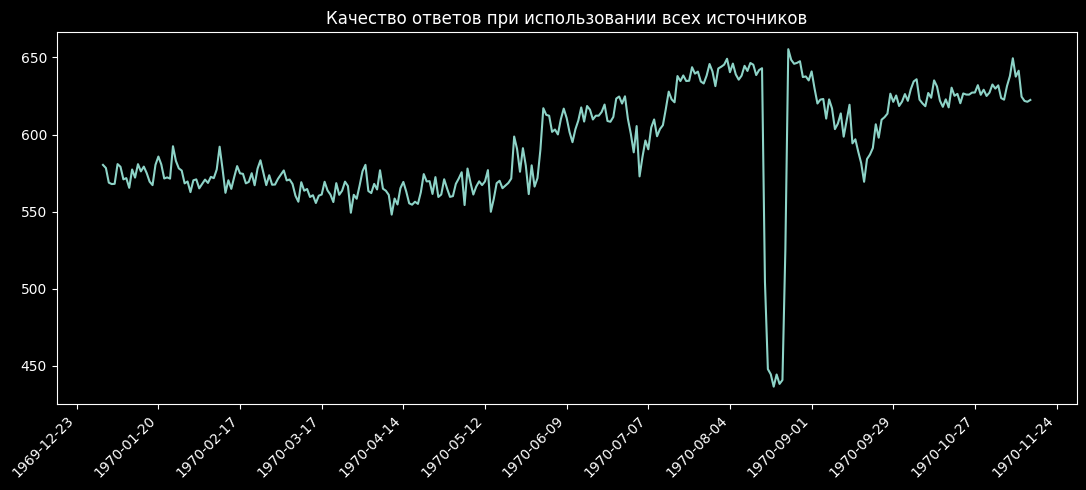

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

ax.plot(df['date'], df['quality_123'])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Качество ответов при использовании всех источников')

plt.tight_layout()

plt.show()

# Качество отчетов после отказа от источника 2

In [37]:
def quality_13(row):
    p1, _, p3 = [row[f'accuracy_{i}_%'] / 100 for i in range(1, 4)]
    return N * (1 - (1 - p1) * (1 - p3))

df['quality_13'] = df.apply(quality_13, axis=1)

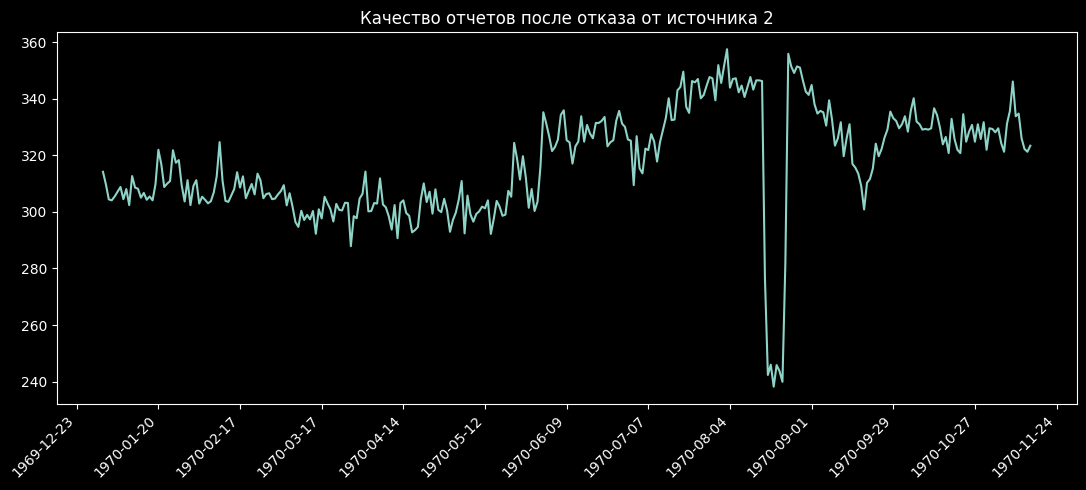

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

ax.plot(df['date'], df['quality_13'])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Качество отчетов после отказа от источника 2')

plt.tight_layout()

plt.show()

# Качество отчетов после отказа от источника 3

In [39]:
def quality_12(row):
    p1, p2, _ = [row[f'accuracy_{i}_%'] / 100 for i in range(1, 4)]
    return N * (1 - (1 - p1) * (1 - p2))

df['quality_12'] = df.apply(quality_12, axis=1)

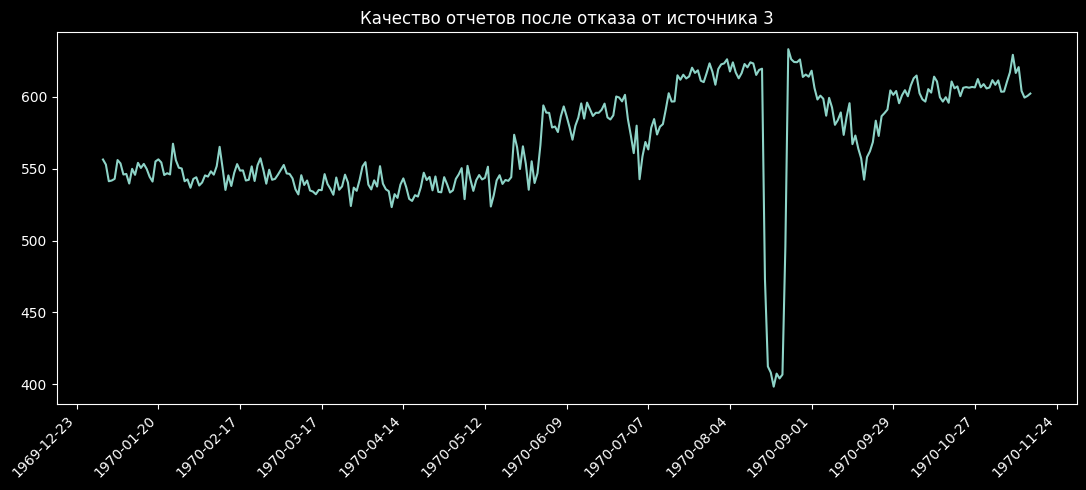

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

ax.plot(df['date'], df['quality_12'])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Качество отчетов после отказа от источника 3')

plt.tight_layout()

plt.show()

# Сравнение

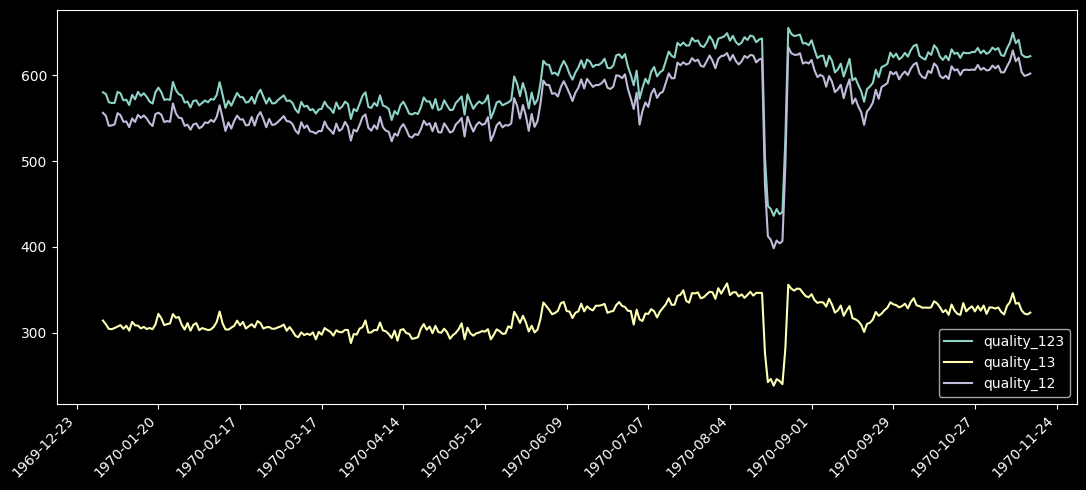

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

for sources in ['123', '13', '12']:
    ax.plot(df['date'], df[f'quality_{sources}'], label=f'quality_{sources}')

    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend()

plt.tight_layout()

plt.show()

# Потери в качестве, при отказе от источников

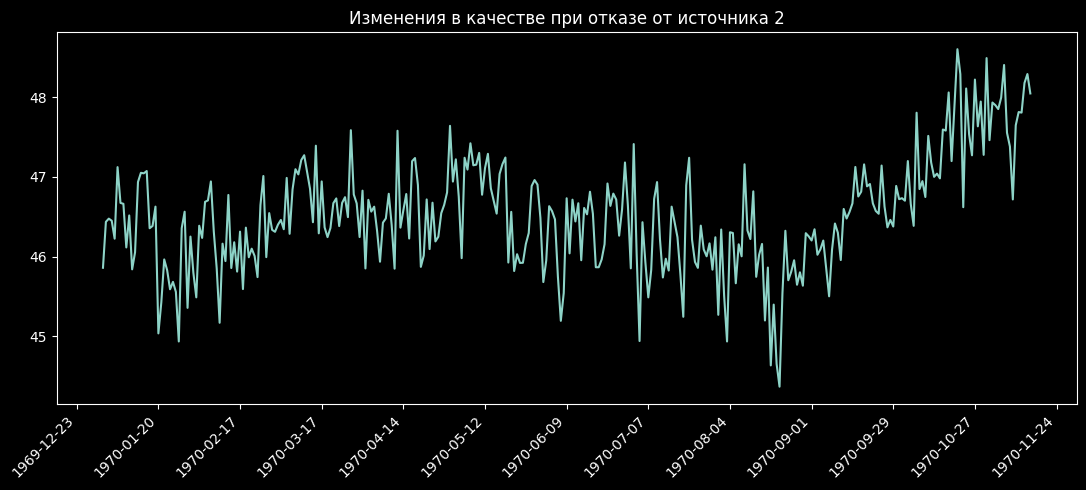

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

ax.plot(df['date'], 100 * (1 - df['quality_13'] / df['quality_123']))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Изменения в качестве при отказе от источника 2')

plt.tight_layout()

plt.show()

In [45]:
(100 * (1 - df['quality_13'] / df['quality_123'])).mean()

np.float64(46.520468923057145)

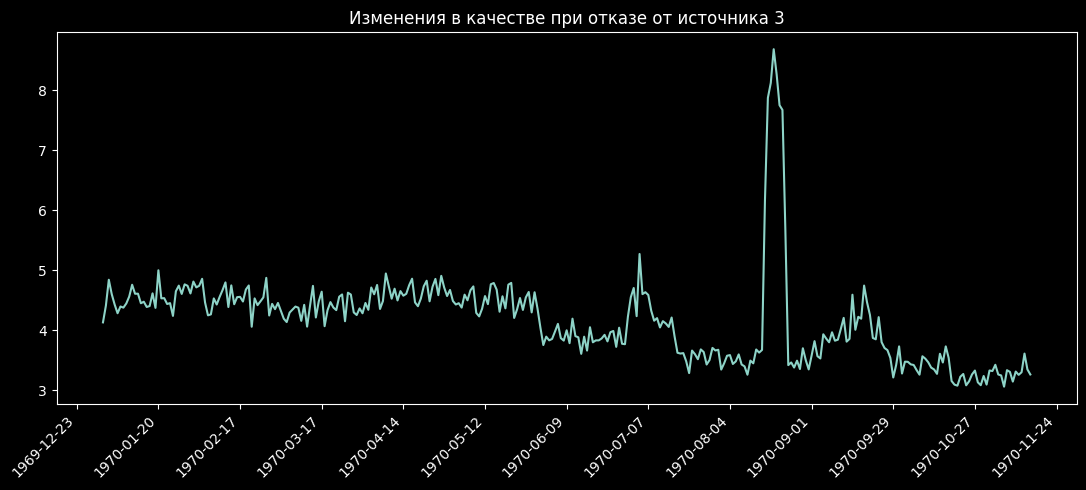

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

ax.plot(df['date'], 100 * (1 - df['quality_12'] / df['quality_123']))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Изменения в качестве при отказе от источника 3')

plt.tight_layout()

plt.show()

In [46]:
(100 * (1 - df['quality_12'] / df['quality_123'])).mean()

np.float64(4.173366121665591)

In [43]:
df.to_csv('data/data_with_extra_columns.csv')